# Import

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read dataset
file_path = "Study Case DA.xlsx"

In [84]:
# Menampilkan semua kolom tanpa terpotong
pd.set_option('display.max_columns', None)

# Dataframe & Sheets

In [85]:
employees = pd.read_excel(file_path, sheet_name="employees")
performance = pd.read_excel(file_path, sheet_name="performance_yearly")
competencies = pd.read_excel(file_path, sheet_name="competencies_yearly")
profiles = pd.read_excel(file_path, sheet_name="profiles_psych")
papi = pd.read_excel(file_path, sheet_name="papi_scores")
strength = pd.read_excel(file_path, sheet_name="strengths")

In [86]:
display(employees.head())
display(performance.head())
display(competencies.head())
display(profiles.head())
display(papi.head())
display(strength.head())

,employee_id,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021


,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021


,employee_id,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki
0,EMP100000,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2
1,EMP100001,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3
2,EMP100002,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3
3,EMP100003,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3
4,EMP100004,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9


,employee_id,scale_code,score
0,EMP100000,Papi_N,2.0
1,EMP100001,Papi_N,8.0
2,EMP100002,Papi_N,9.0
3,EMP100003,Papi_N,9.0
4,EMP100004,Papi_N,7.0


,employee_id,rank,theme
0,EMP100000,1,NaN
1,EMP100001,1,Responsibility
2,EMP100002,1,Restorative
3,EMP100003,1,Belief
4,EMP100004,1,Deliberative


In [87]:
pillars = pd.read_excel(file_path, sheet_name="dim_competency_pillars")

dim_grades = pd.read_excel(file_path, sheet_name="dim_grades")
dim_directorates = pd.read_excel(file_path, sheet_name="dim_directorates")
dim_divisions = pd.read_excel(file_path, sheet_name="dim_divisions")
dim_departments = pd.read_excel(file_path, sheet_name="dim_departments")
dim_positions = pd.read_excel(file_path, sheet_name="dim_positions")
dim_education = pd.read_excel(file_path, sheet_name="dim_education")
dim_majors = pd.read_excel(file_path, sheet_name="dim_majors")
dim_areas = pd.read_excel(file_path, sheet_name="dim_areas")
dim_companies = pd.read_excel(file_path, sheet_name="dim_companies")


In [88]:
# Buat dictionary mapping dari setiap tabel dimensi
map_company = dict(zip(dim_companies["company_id"], dim_companies["name"]))
map_area = dict(zip(dim_areas["area_id"], dim_areas["name"]))
map_position = dict(zip(dim_positions["position_id"], dim_positions["name"]))
map_department = dict(zip(dim_departments["department_id"], dim_departments["name"]))
map_division = dict(zip(dim_divisions["division_id"], dim_divisions["name"]))
map_directorate = dict(zip(dim_directorates["directorate_id"], dim_directorates["name"]))
map_grade = dict(zip(dim_grades["grade_id"], dim_grades["name"]))
map_education = dict(zip(dim_education["education_id"], dim_education["name"]))
map_major = dict(zip(dim_majors["major_id"], dim_majors["name"]))

# Duplikasi data asli agar tidak mengubah 'employees'
employees_name = employees.copy()

# Mapping ID → Nama
employees_name["company_id"] = employees_name["company_id"].map(map_company)
employees_name["area_id"] = employees_name["area_id"].map(map_area)
employees_name["position_id"] = employees_name["position_id"].map(map_position)
employees_name["department_id"] = employees_name["department_id"].map(map_department)
employees_name["division_id"] = employees_name["division_id"].map(map_division)
employees_name["directorate_id"] = employees_name["directorate_id"].map(map_directorate)
employees_name["grade_id"] = employees_name["grade_id"].map(map_grade)
employees_name["education_id"] = employees_name["education_id"].map(map_education)
employees_name["major_id"] = employees_name["major_id"].map(map_major)

# Ubah nama kolom menjadi lebih deskriptif
employees_name = employees_name.rename(columns={
    "company_id": "company_name",
    "area_id": "area_name",
    "position_id": "position_name",
    "department_id": "department_name",
    "division_id": "division_name",
    "directorate_id": "directorate_name",
    "grade_id": "grade_name",
    "education_id": "education_name",
    "major_id": "major_name"
})

display(employees_name.head())


,employee_id,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


# EDA

# Outlier Score

### Performance

In [89]:
performance

,employee_id,rating,year
0,EMP100000,2.0,2021
1,EMP100001,NaN,2021
2,EMP100002,2.0,2021
3,EMP100003,NaN,2021
4,EMP100004,3.0,2021
...,...,...,...
10045,DUP1942,5.0,2025
10046,DUP2096,3.0,2025
10047,DUP4177,2.0,2025
10048,DUP9801,5.0,2025


In [90]:
rating_performance = pd.DataFrame({
    'Jumlah': performance['rating'].value_counts().sort_index(),
    'Persentase (%)': (performance['rating'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_performance)

,Jumlah,Persentase (%)
rating,,
0.0,15,0.17
1.0,672,7.52
2.0,1578,17.65
3.0,3339,37.34
4.0,2437,27.25
5.0,881,9.85
6.0,13,0.15
99.0,7,0.08


C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\1816126311.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')


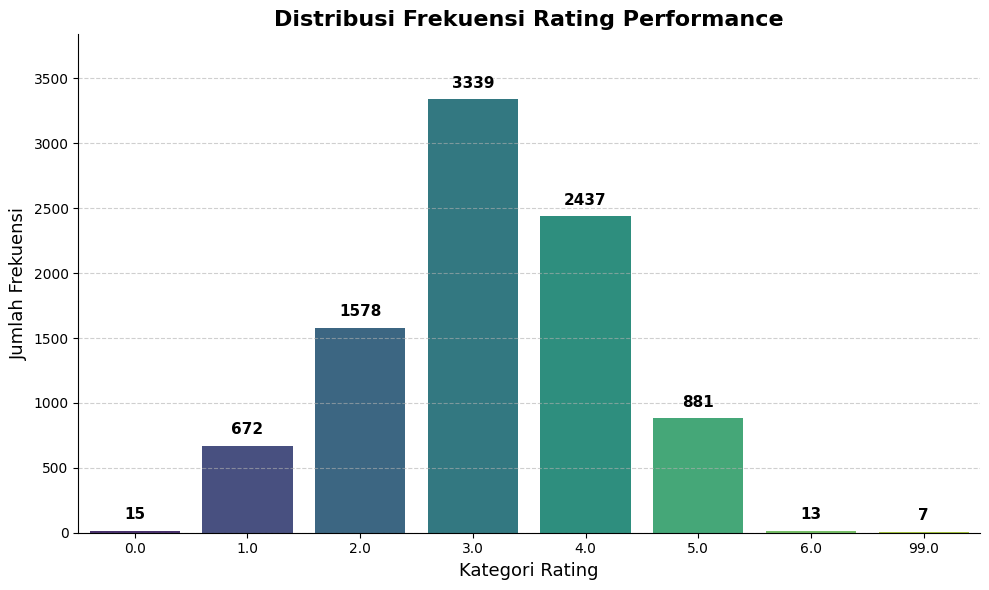

In [91]:
# Hitung frekuensi nilai rating
rating_counts = performance['rating'].value_counts().sort_index()
df_counts = rating_counts.reset_index()
df_counts.columns = ['Rating', 'Jumlah']

# Plot distribusi rating
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Rating', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi Rating Performance', fontsize=16, weight='bold')
plt.xlabel('Kategori Rating', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [92]:
# --- Duplikasi dataframe agar data asli tetap aman ---
performance_clean = performance.copy()

# Ganti nilai di luar 1–5 menjadi NaN
performance_clean.loc[
    (performance_clean['rating'] < 1) | (performance_clean['rating'] > 5),
    'rating'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi rating setelah pembersihan:\n")
print(performance_clean['rating'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = performance_clean['rating'].isna().sum()
print(f"\nJumlah nilai rating yang diubah menjadi NaN: {num_nan}")



Distribusi rating setelah pembersihan:

rating
1.0     672
2.0    1578
3.0    3339
4.0    2437
5.0     881
NaN    1143
Name: count, dtype: int64

Jumlah nilai rating yang diubah menjadi NaN: 1143


### Competencies

In [93]:
competencies

,employee_id,score,pillar_code,year
0,EMP100000,2.0,GDR,2021
1,EMP100001,NaN,GDR,2021
2,EMP100002,1.0,GDR,2021
3,EMP100003,NaN,GDR,2021
4,EMP100004,3.0,GDR,2021
...,...,...,...,...
100495,DUP1942,5.0,CSI,2025
100496,DUP2096,3.0,CSI,2025
100497,DUP4177,2.0,CSI,2025
100498,DUP9801,5.0,CSI,2025


In [94]:
rating_competencies = pd.DataFrame({
    'Jumlah': competencies['score'].value_counts().sort_index(),
    'Persentase (%)': (competencies['score'].value_counts(normalize=True).sort_index() * 100).round(2)
})
display(rating_competencies)

,Jumlah,Persentase (%)
score,,
0.0,163,0.18
1.0,8688,9.68
2.0,17857,19.91
3.0,28206,31.44
4.0,22936,25.57
5.0,11523,12.84
6.0,165,0.18
99.0,171,0.19


C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\4186793133.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')


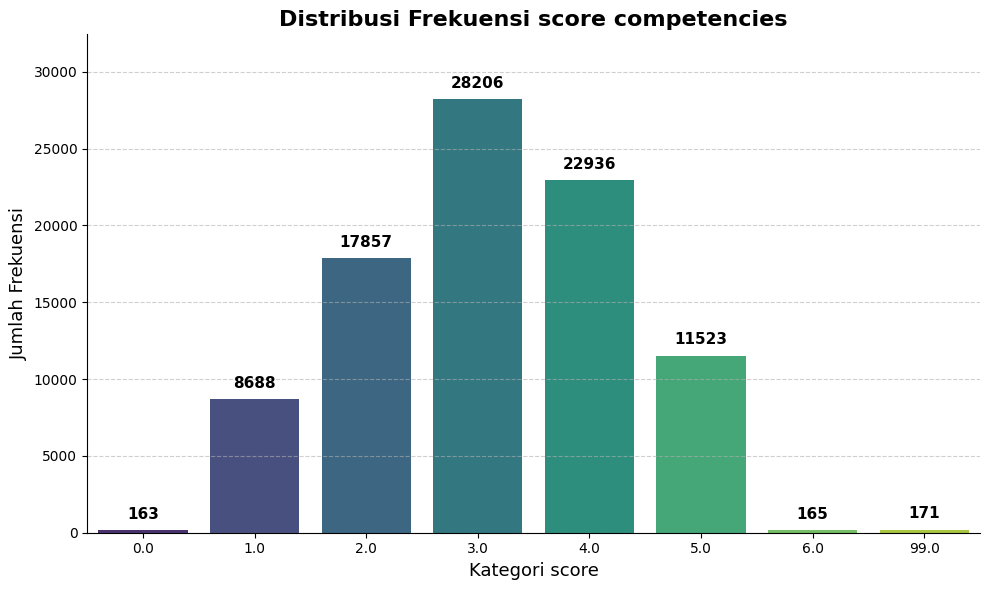

In [95]:
# Hitung frekuensi nilai score
score_counts = competencies['score'].value_counts().sort_index()
df_counts = score_counts.reset_index()
df_counts.columns = ['score', 'Jumlah']

# Plot distribusi score
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='score', y='Jumlah', data=df_counts, palette='viridis')

# Tambahkan label jumlah di atas tiap batang
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2,
            height + (df_counts['Jumlah'].max() * 0.02),
            f'{int(height)}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.title('Distribusi Frekuensi score competencies', fontsize=16, weight='bold')
plt.xlabel('Kategori score', fontsize=13)
plt.ylabel('Jumlah Frekuensi', fontsize=13)
plt.ylim(0, df_counts['Jumlah'].max() * 1.15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [96]:
# --- Duplikasi dataframe agar data asli tetap aman ---
competencies_clean = competencies.copy()

# Ganti nilai di luar 1–5 menjadi NaN
competencies_clean.loc[
    (competencies_clean['score'] < 1) | (competencies_clean['score'] > 5),
    'score'
] = np.nan

# Tampilkan hasil setelah pembersihan
print("\nDistribusi score setelah pembersihan:\n")
print(competencies_clean['score'].value_counts(dropna=False).sort_index())

# Cek jumlah data yang diubah jadi NaN
num_nan = competencies_clean['score'].isna().sum()
print(f"\nJumlah nilai score yang diubah menjadi NaN: {num_nan}")



Distribusi score setelah pembersihan:

score
1.0     8688
2.0    17857
3.0    28206
4.0    22936
5.0    11523
NaN    11290
Name: count, dtype: int64

Jumlah nilai score yang diubah menjadi NaN: 11290


## Contextual factors

In [97]:
performance_employees_name = (
    performance_clean
    .merge(employees_name, on="employee_id", how="left")
)
display(performance_employees_name.head())

,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34


In [98]:
performance_employees = (
    performance_clean
    .merge(employees, on="employee_id", how="left")
)
display(performance_employees.head())

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34


In [99]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees_name['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees_name['years_of_service_adjusted'] = (
    performance_employees_name['years_of_service_months']
    - (LATEST_YEAR - performance_employees_name['year']) * 12
)

# Tampilkan hasil
display(performance_employees_name.head())


,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64,16
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16,-32
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58,10
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15,-33
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34,-14


In [100]:
# Tentukan tahun terakhir di dataset
LATEST_YEAR = performance_employees['year'].max()

# Hitung masa kerja yang disesuaikan untuk setiap baris
performance_employees['years_of_service_adjusted'] = (
    performance_employees['years_of_service_months']
    - (LATEST_YEAR - performance_employees['year']) * 12
)

# Tampilkan hasil
display(performance_employees.head())


,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,directorate_id,grade_id,education_id,major_id,years_of_service_months,years_of_service_adjusted
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,3,2,3,1,64,16
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,3,1,1,2,16,-32
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,3,1,3,1,58,10
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,1,2,2,5,15,-33
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,3,1,1,5,34,-14


In [101]:
corr_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id',
    'years_of_service_adjusted',
    'rating'
]

corr_vars_name = [
    'company_name',
    'area_name',
    'position_name',
    'department_name',
    'division_name',
    'directorate_name',
    'grade_name',
    'education_name',
    'major_name',
    'years_of_service_adjusted',
    'rating'
]

In [102]:
import numpy as np
import pandas as pd
from scipy import stats

df_name = performance_employees_name.copy()
df_name['rating'] = pd.to_numeric(df_name['rating'], errors='coerce')
print("Missing per var:\n", df_name[corr_vars_name].isna().mean())


Missing per var:
 company_name                 0.000000
area_name                    0.000000
position_name                0.000000
department_name              0.000000
division_name                0.000000
directorate_name             0.000000
grade_name                   0.000000
education_name               0.000000
major_name                   0.000000
years_of_service_adjusted    0.000000
rating                       0.113731
dtype: float64


In [103]:
import numpy as np
import pandas as pd
from scipy import stats

df = performance_employees.copy()
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
print("Missing per var:\n", df[corr_vars].isna().mean())


Missing per var:
 company_id                   0.000000
area_id                      0.000000
position_id                  0.000000
department_id                0.000000
division_id                  0.000000
directorate_id               0.000000
grade_id                     0.000000
education_id                 0.000000
major_id                     0.000000
years_of_service_adjusted    0.000000
rating                       0.113731
dtype: float64


In [104]:
# drop kolom yang tidak relevan (numerik dan target)
corr_vars_cat = [c for c in corr_vars_name if c not in [
    'years_of_service_adjusted',
    'rating'
]]

# tambahkan kolom target biner
df_name['is_high'] = (df_name['rating'] == 5).astype(int)

for cat in corr_vars_cat:
    out = (df_name.groupby(cat)['is_high']
             .agg(['sum','count'])
             .assign(prop=lambda x: (x['sum'] / x['count']).round(4))
             .sort_values('prop', ascending=False))
    print(f"\nTop groups by prop high performer in {cat}:")
    display(out.head(10))



Top groups by prop high performer in company_name:


,sum,count,prop
company_name,,,
PT Mandala Distribution Center,252,2485,0.1014
PT VASKA Wellness,231,2660,0.0868
PT Aurora Beauty Indonesia,202,2435,0.0830
PT Lumo Cosmetics Asia,196,2470,0.0794



Top groups by prop high performer in area_name:


,sum,count,prop
area_name,,,
HQ,223,2410,0.0925
Plant,217,2445,0.0888
Distribution,232,2710,0.0856
Store,209,2485,0.0841



Top groups by prop high performer in position_name:


,sum,count,prop
position_name,,,
Finance Officer,159,1710,0.0930
HRBP,165,1805,0.0914
Sales Supervisor,145,1650,0.0879
Supply Planner,138,1610,0.0857
Data Analyst,143,1670,0.0856
Brand Executive,131,1605,0.0816



Top groups by prop high performer in department_name:


,sum,count,prop
department_name,,,
Marketing,158,1660,0.0952
IT,169,1820,0.0929
Finance,140,1570,0.0892
Operations,154,1780,0.0865
HR,131,1610,0.0814
R&D,129,1610,0.0801



Top groups by prop high performer in division_name:


,sum,count,prop
division_name,,,
Operations,190,1975,0.0962
Product Dev,187,2060,0.0908
Sales,171,2025,0.0844
Talent Management,173,2065,0.0838
Digital Marketing,160,1925,0.0831



Top groups by prop high performer in directorate_name:


,sum,count,prop
directorate_name,,,
Technology,337,3515,0.0959
HR & Corp Affairs,281,3370,0.0834
Commercial,263,3165,0.0831



Top groups by prop high performer in grade_name:


,sum,count,prop
grade_name,,,
III,309,3380,0.0914
IV,294,3315,0.0887
V,278,3355,0.0829



Top groups by prop high performer in education_name:


,sum,count,prop
education_name,,,
S2,259,2630,0.0985
S1,229,2515,0.0911
SMA,202,2315,0.0873
D3,191,2590,0.0737



Top groups by prop high performer in major_name:


,sum,count,prop
major_name,,,
Engineering,161,1640,0.0982
Economics,172,1840,0.0935
Psychology,147,1715,0.0857
Business,135,1590,0.0849
Statistics,138,1650,0.0836
Design,128,1615,0.0793


In [105]:
df_name.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,8907.0,3.143370,1.061965,1.0,2.0,3.0,4.0,5.0
year,10050.0,2023.000000,1.414284,2021.0,2022.0,2023.0,2024.0,2025.0
nip,10050.0,550175.979104,259281.065710,100945.0,325705.0,540371.0,776343.0,999361.0
years_of_service_months,10050.0,50.124378,25.176567,0.0,32.0,50.0,66.0,149.0
years_of_service_adjusted,10050.0,26.124378,30.362612,-48.0,5.0,25.0,47.0,149.0
is_high,10050.0,0.087662,0.282816,0.0,0.0,0.0,0.0,1.0


In [106]:
df_high = df_name[df_name['is_high'] == 1]
statistik_is_high_1 = df_high.describe().T

print("Statistik Deskriptif untuk is_high = 1:")
display(statistik_is_high_1)

df_high = df_name[df_name['is_high'] == 0]
statistik_is_high_0 = df_high.describe().T

print("Statistik Deskriptif untuk is_high = 0:")
display(statistik_is_high_0)

Statistik Deskriptif untuk is_high = 1:


,count,mean,std,min,25%,50%,75%,max
rating,881.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
year,881.0,2023.083995,1.345778,2021.0,2022.0,2023.0,2024.0,2025.0
nip,881.0,550863.374574,262626.402471,100945.0,329348.0,531823.0,802474.0,998572.0
years_of_service_months,881.0,51.373439,24.608113,0.0,34.0,52.0,68.0,133.0
years_of_service_adjusted,881.0,28.381385,28.645281,-33.0,7.0,27.0,49.0,125.0
is_high,881.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


Statistik Deskriptif untuk is_high = 0:


,count,mean,std,min,25%,50%,75%,max
rating,8026.0,2.939571,0.911928,1.0,2.0,3.0,4.0,4.0
year,9169.0,2022.991929,1.420501,2021.0,2022.0,2023.0,2024.0,2025.0
nip,9169.0,550109.930963,258971.748645,100945.0,325441.0,540638.0,775302.0,999361.0
years_of_service_months,9169.0,50.004363,25.228571,0.0,31.0,49.0,66.0,149.0
years_of_service_adjusted,9169.0,25.907514,30.515227,-48.0,4.0,25.0,47.0,149.0
is_high,9169.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [107]:
# tambahkan kolom target biner
df['is_high'] = (df['rating'] == 5).astype(int)


In [110]:
import scipy.stats as stats
import numpy as np

cramers_results = []
for cat in corr_vars_cat:
    table = pd.crosstab(df_name[cat], df_name['is_high'])
    chi2, p, dof, exp = stats.chi2_contingency(table)
    n = table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(table.shape) - 1)))
    print(f"{cat}: Cramér’s V = {cramers_v:.3f}, p = {p:.4f}")
    cramers_results.append({'Variable': cat, 'CramersV': cramers_v, 'p_value': p})



company_name: Cramér’s V = 0.029, p = 0.0336
area_name: Cramér’s V = 0.011, p = 0.7323
position_name: Cramér’s V = 0.013, p = 0.8736
department_name: Cramér’s V = 0.019, p = 0.5781
division_name: Cramér’s V = 0.018, p = 0.5249
directorate_name: Cramér’s V = 0.021, p = 0.1022
grade_name: Cramér’s V = 0.013, p = 0.4477
education_name: Cramér’s V = 0.032, p = 0.0149
major_name: Cramér’s V = 0.022, p = 0.4115


C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\2067235499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


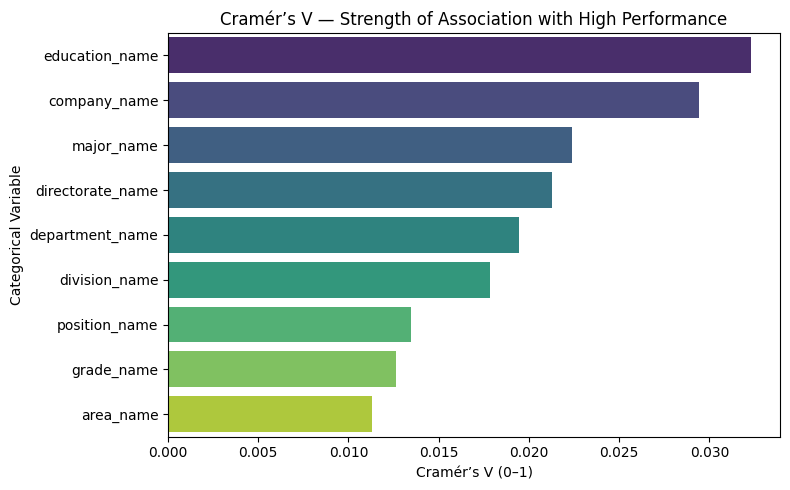

In [111]:
cramers_df = pd.DataFrame(cramers_results).sort_values(by='CramersV', ascending=False)

# --- 2️⃣ Plot Bar Chart dengan Seaborn ---
plt.figure(figsize=(8, 5))
sns.barplot(
    data=cramers_df,
    x='CramersV',
    y='Variable',
    palette='viridis'
)
plt.title("Cramér’s V — Strength of Association with High Performance")
plt.xlabel("Cramér’s V (0–1)")
plt.ylabel("Categorical Variable")
plt.tight_layout()
plt.show()


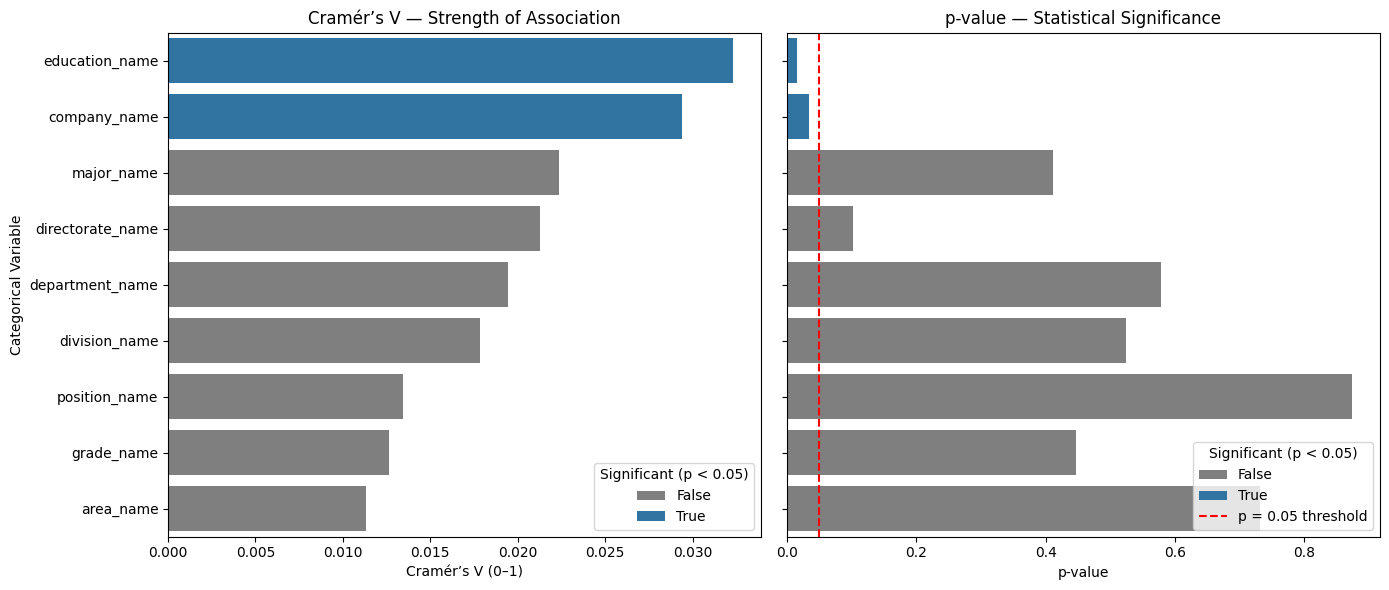

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# pastikan sudah ada cramers_df seperti ini:
# cramers_df = pd.DataFrame(cramers_results).sort_values(by='CramersV', ascending=False)

# tambah kolom signifikan
cramers_df['Significant'] = cramers_df['p_value'] < 0.05

# --- 1️⃣ Membuat dua subplot berdampingan ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# --- Plot kiri: Cramér’s V ---
sns.barplot(
    data=cramers_df,
    x='CramersV',
    y='Variable',
    hue='Significant',
    dodge=False,
    palette={True: 'tab:blue', False: 'tab:gray'},
    ax=axes[0]
)
axes[0].set_title("Cramér’s V — Strength of Association")
axes[0].set_xlabel("Cramér’s V (0–1)")
axes[0].set_ylabel("Categorical Variable")
axes[0].legend(title="Significant (p < 0.05)", loc='lower right')

# --- Plot kanan: p-value ---
sns.barplot(
    data=cramers_df,
    x='p_value',
    y='Variable',
    hue='Significant',
    dodge=False,
    palette={True: 'tab:blue', False: 'tab:gray'},
    ax=axes[1]
)
axes[1].axvline(0.05, color='red', linestyle='--', label='p = 0.05 threshold')
axes[1].set_title("p-value — Statistical Significance")
axes[1].set_xlabel("p-value")
axes[1].set_ylabel("")
axes[1].legend(title="Significant (p < 0.05)", loc='lower right')

# --- layout rapi ---
plt.tight_layout()
plt.show()


Cramér’s V berada di kisaran 0.0–1.0
Semakin dekat ke 1 → hubungan semakin kuat

Berdasarkan hasil uji hubungan antara variabel kategorikal dengan status kinerja tinggi menggunakan uji chi-square dan Cramér’s V, seluruh variabel menunjukkan nilai asosiasi yang sangat lemah (Cramér’s V < 0.05). Meskipun beberapa variabel seperti education_id (p = 0.0149) dan company_id (p = 0.0336) signifikan secara statistik, kekuatan hubungannya tidak cukup besar untuk dianggap bermakna secara praktis. Hal ini mengindikasikan bahwa karakteristik seperti pendidikan formal, grade jabatan, maupun struktur organisasi tidak secara nyata membedakan kelompok karyawan dengan performa tinggi dari kelompok lainnya.

Dengan kata lain, performa tinggi karyawan tidak dapat dijelaskan hanya melalui faktor demografis atau struktural organisasi. Faktor lain seperti kualitas kepemimpinan, motivasi individu, budaya kerja, dan peluang pengembangan kemungkinan memiliki peran yang lebih besar dalam menentukan performa karyawan.

In [24]:
from math import isnan
num_vars = ['years_of_service_adjusted','rating']
corrs = []
for a in num_vars:
    for b in num_vars:
        if a==b: continue
        valid = df[[a,b]].dropna()
        if len(valid) < 10: 
            continue
        r, p = stats.pearsonr(valid[a], valid[b])
        corrs.append({'var1':a,'var2':b,'r':r,'p':p,'n':len(valid)})
corr_df = pd.DataFrame(corrs).sort_values('r', key=abs, ascending=False)
display(corr_df)


,var1,var2,r,p,n
0,years_of_service_adjusted,rating,0.008036,0.448286,8907
1,rating,years_of_service_adjusted,0.008036,0.448286,8907


Korelasi antara years_of_service_adjusted dan rating

Korelasi hampir nol (r = 0.010) → tidak ada hubungan linear antara lama masa kerja dan kinerja.

p-value > 0.05 → tidak signifikan.

Kesimpulan: Lama bekerja tidak menjamin kinerja tinggi

Tidak ditemukan hubungan linear yang berarti antara masa kerja dengan hasil kinerja (rating).

In [25]:
# point-biserial is equivalent to Pearson between continuous var and binary is_high
for v in ['years_of_service_adjusted']:
    valid = df[[v,'is_high']].dropna()
    r,p = stats.pointbiserialr(valid['is_high'], valid[v]) if hasattr(stats, 'pointbiserialr') else stats.pearsonr(valid[v], valid['is_high'])
    print(v, "r=", r, "p=", p, "n=", len(valid))


years_of_service_adjusted r= 0.02304317361546778 p= 0.02088315309976612 n= 10050


Berdasarkan hasil perhitungan korelasi point-biserial antara variabel masa kerja (years_of_service_adjusted) dengan status high performer (is_high), diperoleh temuan sebagai berikut:

years_of_service_adjusted menunjukkan nilai korelasi r = 0.023 dengan p = 0.0209.

Nilai r positif yang sangat kecil menandakan bahwa semakin lama masa kerja yang telah disesuaikan, cenderung sedikit meningkatkan kemungkinan karyawan menjadi high performer.

Namun, pengaruhnya sangat lemah secara praktis, meskipun signifikan secara statistik (p < 0.05).

Ini mungkin disebabkan oleh ukuran sampel yang besar (n = 10.050) sehingga perbedaan kecil menjadi signifikan.

In [26]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# variabel kategori
cat_vars = [
    'company_id',
    'area_id',
    'position_id',
    'department_id',
    'division_id',
    'directorate_id',
    'grade_id',
    'education_id',
    'major_id'
]

# variabel numerik
num_vars = ['years_of_service_adjusted']

# gabungkan
feat = num_vars
X = df[feat].copy()
X = pd.concat([X, pd.get_dummies(df[cat_vars], drop_first=True)], axis=1)

# target
y = df['is_high']

# buang missing
mask = y.notna() & X.notna().all(axis=1)
X2 = sm.add_constant(X.loc[mask])

# model logit
model = sm.Logit(y.loc[mask], X2).fit(disp=False)

# hasil ringkasan & odds ratio
print(model.summary())
odds = np.exp(model.params)
print("\nTop 10 Odds Ratios:")
print(odds.sort_values(ascending=False).head(10))


                           Logit Regression Results                           
Dep. Variable:                is_high   No. Observations:                10050
Model:                          Logit   Df Residuals:                    10039
Method:                           MLE   Df Model:                           10
Date:                Fri, 24 Oct 2025   Pseudo R-squ.:                0.003153
Time:                        18:26:32   Log-Likelihood:                -2976.4
converged:                       True   LL-Null:                       -2985.8
Covariance Type:            nonrobust   LLR p-value:                   0.04250
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -2.7664      0.246    -11.235      0.000      -3.249      -2.284
years_of_service_adjusted     0.0027      0.001      2.303      0.021       0.000     

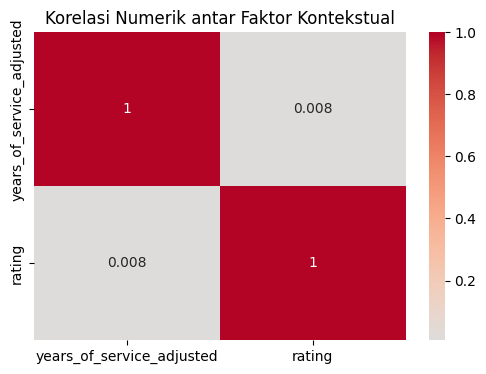

C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\39801756.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_prop.index.map(map_education), y=edu_prop.values, palette='viridis')


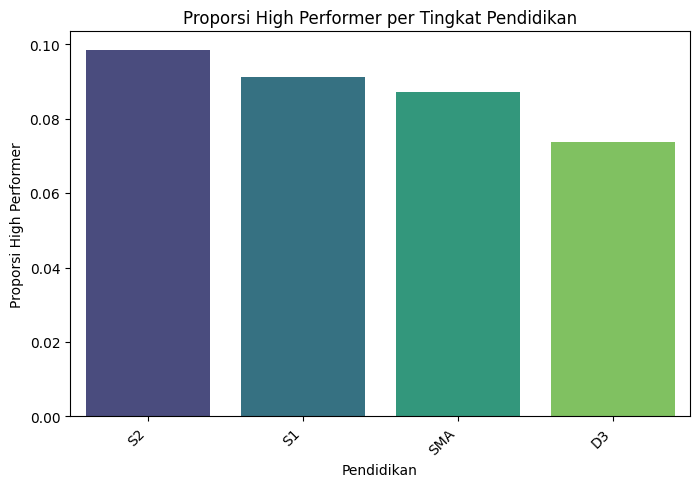

In [ ]:
# Heatmap korelasi numerik
plt.figure(figsize=(6, 4))
sns.heatmap(df[['years_of_service_adjusted','rating']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Korelasi Numerik antar Faktor Kontekstual")
plt.show()

# Barplot proporsi high performer per education
edu_prop = (
    df.groupby('education_id')['is_high']
    .mean()
    .sort_values(ascending=False)
)
plt.figure(figsize=(8,5))
sns.barplot(x=edu_prop.index.map(map_education), y=edu_prop.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Proporsi High Performer per Tingkat Pendidikan')
plt.ylabel('Proporsi High Performer')
plt.xlabel('Pendidikan')
plt.show()


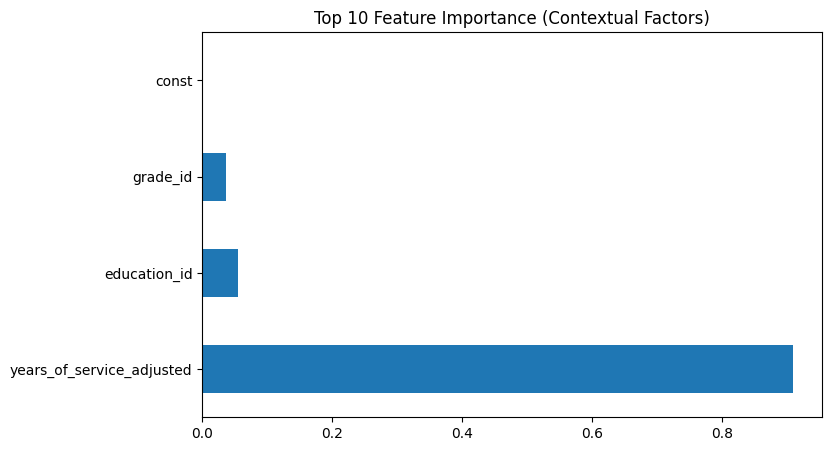

In [54]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X.fillna(0), y)
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind='barh', figsize=(8,5))
plt.title('Top 10 Feature Importance (Contextual Factors)')
plt.show()


Training Accuracy (Binary is_high): 1.0000

Top 10 Feature Importances (Binary):


years_of_service_adjusted    0.506232
department_id                0.070666
position_id                  0.069307
major_id                     0.067325
division_id                  0.061777
area_id                      0.054840
education_id                 0.047633
company_id                   0.046267
grade_id                     0.040765
directorate_id               0.035188
dtype: float64

C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\599835071.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_bin.head(10), y=feat_imp_bin.head(10).index, palette='viridis')


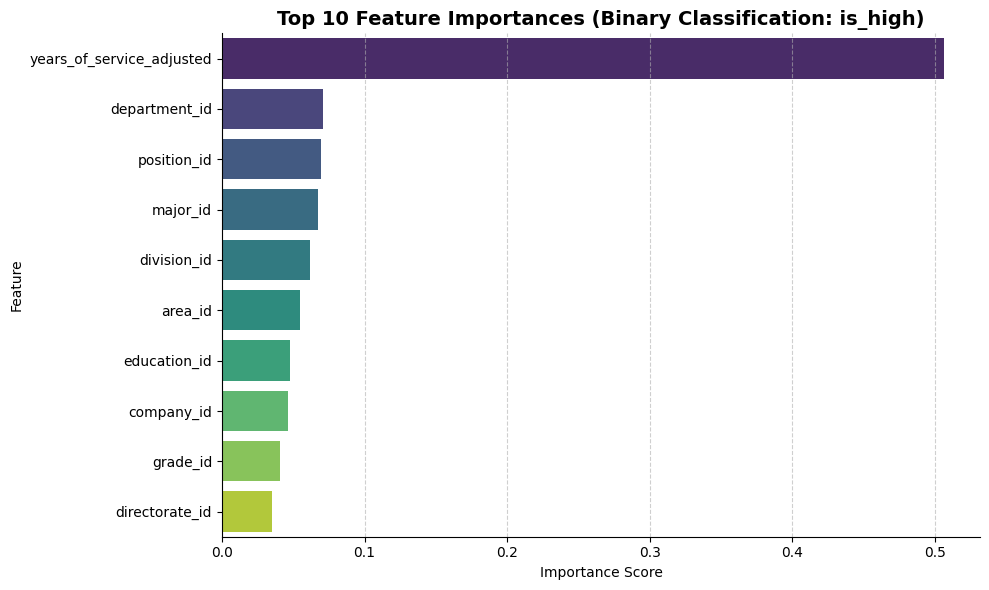


Training Accuracy (Multi-class rating 1–5): 1.0000

Top 10 Feature Importances (Multi-class):


years_of_service_adjusted    0.467437
position_id                  0.074638
department_id                0.074541
major_id                     0.070017
division_id                  0.065734
area_id                      0.057240
education_id                 0.054211
company_id                   0.052950
grade_id                     0.042542
directorate_id               0.040691
dtype: float64

C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\599835071.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp_multi.head(10), y=feat_imp_multi.head(10).index, palette='magma')


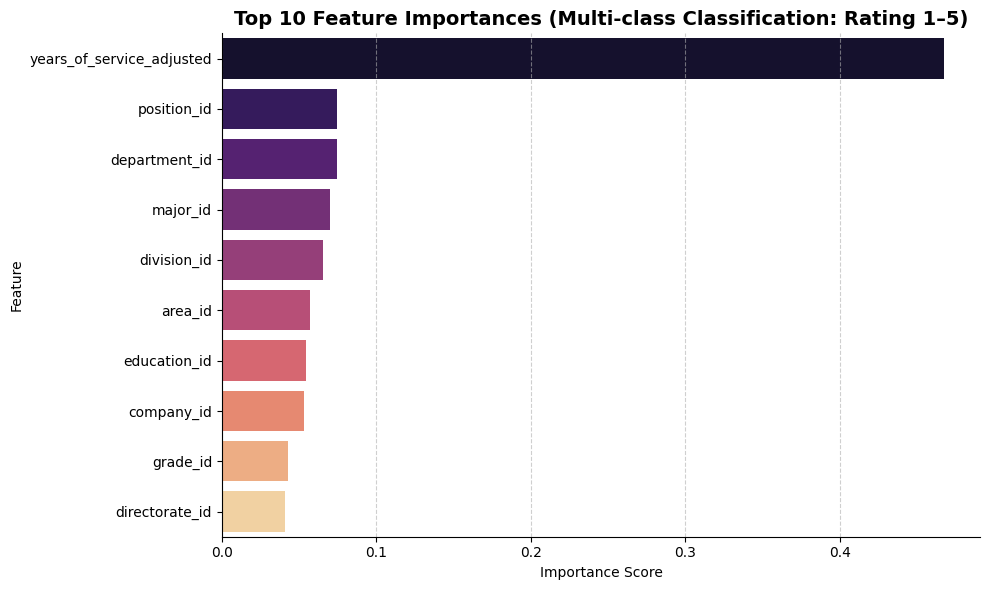

In [60]:
# ============================================================
# IMPORTS
# ============================================================
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================
# DATA PREPARATION
# ============================================================
df_rf = performance_employees.copy()

# ============================================================
# STEP 1 - BINARY CLASSIFICATION (High Performer vs Not)
# ============================================================

df_rf['is_high'] = (df_rf['rating'] == 5).astype(int)

drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'rating', 'years_of_service_months']
df_bin = df_rf.drop(columns=drop_cols, errors='ignore')

# ❗ Hapus kolom target dari fitur
X_bin = df_bin.select_dtypes(include=['number']).drop(columns=['is_high'], errors='ignore').fillna(0)
y_bin = df_rf['is_high']

rf_bin = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_bin.fit(X_bin, y_bin)

train_acc_bin = accuracy_score(y_bin, rf_bin.predict(X_bin))
print(f"Training Accuracy (Binary is_high): {train_acc_bin:.4f}")

feat_imp_bin = pd.Series(rf_bin.feature_importances_, index=X_bin.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Binary):")
display(feat_imp_bin.head(10))


# Visualisasi feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp_bin.head(10), y=feat_imp_bin.head(10).index, palette='viridis')
plt.title("Top 10 Feature Importances (Binary Classification: is_high)", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


# ============================================================
# STEP 2 - MULTI-CLASS CLASSIFICATION (Rating 1–5)
# ============================================================

df_multi = performance_employees.copy()

# Hapus baris dengan rating = 0 atau NaN
df_multi = df_multi[df_multi['rating'].notna() & (df_multi['rating'] != 0)]

# Drop kolom non-relevan
drop_cols = ['employee_id', 'year', 'fullname', 'nip', 'years_of_service_months']
df_multi = df_multi.drop(columns=drop_cols, errors='ignore')

# Pisahkan fitur dan target
X_multi = df_multi.select_dtypes(include=['number']).drop(columns=['rating'], errors='ignore').fillna(0)
y_multi = df_multi['rating']

# Model
rf_multi = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf_multi.fit(X_multi, y_multi)

# Akurasi training
train_acc_multi = accuracy_score(y_multi, rf_multi.predict(X_multi))
print(f"\nTraining Accuracy (Multi-class rating 1–5): {train_acc_multi:.4f}")

# Feature importance
feat_imp_multi = pd.Series(rf_multi.feature_importances_, index=X_multi.columns).sort_values(ascending=False)
print("\nTop 10 Feature Importances (Multi-class):")
display(feat_imp_multi.head(10))

# Visualisasi feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp_multi.head(10), y=feat_imp_multi.head(10).index, palette='magma')
plt.title("Top 10 Feature Importances (Multi-class Classification: Rating 1–5)", fontsize=14, weight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.grid(axis='x', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()


In [127]:
df_contextual = performance_employees_name.copy()
df_contextual['is_high'] = (df_contextual['rating'] == 5).astype(int)

context_cols = [
    'company_name', 'area_name', 'position_name', 'department_name',
    'division_name', 'directorate_name', 'grade_name',
    'education_name', 'major_name'
]

num_cols = ['years_of_service_adjusted']
overall_high_rate = df_contextual['is_high'].mean()


In [129]:
overall_high_rate

np.float64(0.08766169154228856)

In [131]:
alpha = 5  # smoothing factor
category_scores = {}

for col in context_cols:
    tbl = df_contextual.groupby(col)['is_high'].agg(['sum','count']).reset_index()
    tbl['prop_adj'] = (alpha * overall_high_rate + tbl['sum']) / (alpha + tbl['count'])
    mapping = tbl.set_index(col)['prop_adj'].to_dict()
    category_scores[col] = mapping
    df_contextual[col + '_score'] = df_contextual[col].map(mapping).fillna(overall_high_rate)


In [132]:
df_contextual

,employee_id,rating,year,fullname,nip,company_name,area_name,position_name,department_name,division_name,directorate_name,grade_name,education_name,major_name,years_of_service_months,years_of_service_adjusted,is_high,company_name_score,area_name_score,position_name_score,department_name_score,division_name_score,directorate_name_score,grade_name_score,education_name_score,major_name_score
0,EMP100000,2.0,2021,Rendra Pratama,806137,PT Aurora Beauty Indonesia,Store,Brand Executive,R&D,Product Dev,Technology,IV,S2,Business,64,16,0,0.082967,0.084112,0.081639,0.080148,0.090769,0.095863,0.088686,0.098459,0.084914
1,EMP100001,NaN,2021,Wulan Setiawan,476388,PT Mandala Distribution Center,Store,HRBP,Operations,Talent Management,Technology,III,D3,Design,16,-32,0,0.101381,0.084112,0.091402,0.086520,0.083787,0.095863,0.091415,0.073772,0.079283
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,PT Aurora Beauty Indonesia,Plant,Sales Supervisor,Finance,Digital Marketing,Technology,III,S2,Business,58,10,0,0.082967,0.088750,0.087878,0.089167,0.083129,0.095863,0.091415,0.098459,0.084914
3,EMP100003,NaN,2021,Oka Halim,751615,PT Aurora Beauty Indonesia,Plant,HRBP,HR,Digital Marketing,Commercial,IV,S1,Psychology,15,-33,0,0.082967,0.088750,0.091402,0.081386,0.083129,0.083104,0.088686,0.091047,0.085720
4,EMP100004,3.0,2021,Dwi Pratama,443809,PT Lumo Cosmetics Asia,Store,Supply Planner,Operations,Product Dev,Technology,III,D3,Psychology,34,-14,0,0.079369,0.084112,0.085720,0.086520,0.090769,0.095863,0.091415,0.073772,0.085720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,DUP1942,5.0,2025,Dewi Fadillah Hidayat,325441,PT Mandala Distribution Center,Store,Brand Executive,Marketing,Digital Marketing,Commercial,IV,S1,Design,79,79,1,0.101381,0.084112,0.081639,0.095158,0.083129,0.083104,0.088686,0.091047,0.079283
10046,DUP2096,3.0,2025,Putri Wibowo,149080,PT Lumo Cosmetics Asia,Plant,HRBP,Marketing,Operations,HR & Corp Affairs,III,S2,Engineering,49,49,0,0.079369,0.088750,0.091402,0.095158,0.096181,0.083389,0.091415,0.098459,0.098139
10047,DUP4177,2.0,2025,Adi Ginting,116115,PT Mandala Distribution Center,HQ,Supply Planner,Marketing,Sales,HR & Corp Affairs,V,S1,Business,75,75,0,0.101381,0.092521,0.085720,0.095158,0.084452,0.083389,0.082869,0.091047,0.084914
10048,DUP9801,5.0,2025,Ayu Kusuma Santoso,889823,PT VASKA Wellness,Plant,Finance Officer,IT,Digital Marketing,Technology,III,S1,Engineering,7,7,1,0.086844,0.088750,0.092967,0.092843,0.083129,0.095863,0.091415,0.091047,0.098139


In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_contextual['yos_norm'] = scaler.fit_transform(
    df_contextual[['years_of_service_adjusted']].fillna(0)
)


In [120]:
from sklearn.ensemble import RandomForestClassifier

feat_cols = [c + '_score' for c in context_cols] + ['yos_norm']
X = df_contextual[feat_cols].fillna(df_contextual[feat_cols].mean())
y = df_contextual['is_high']

rf = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=feat_cols)
weights = (importances / importances.sum()).to_dict()

print("Bobot variabel kontekstual:")
display(importances.sort_values(ascending=False))


Bobot variabel kontekstual:


yos_norm                  0.514029
position_name_score       0.068969
department_name_score     0.067722
major_name_score          0.065579
division_name_score       0.060056
area_name_score           0.053838
company_name_score        0.046836
education_name_score      0.045951
grade_name_score          0.040308
directorate_name_score    0.036712
dtype: float64

In [121]:
df_contextual['contextual_index'] = 0.0
for f in feat_cols:
    df_contextual['contextual_index'] += df_contextual[f].fillna(df_contextual[f].mean()) * weights.get(f, 0)

# Normalisasi ke 0–1
df_contextual['contextual_index'] = MinMaxScaler().fit_transform(
    df_contextual[['contextual_index']]
)


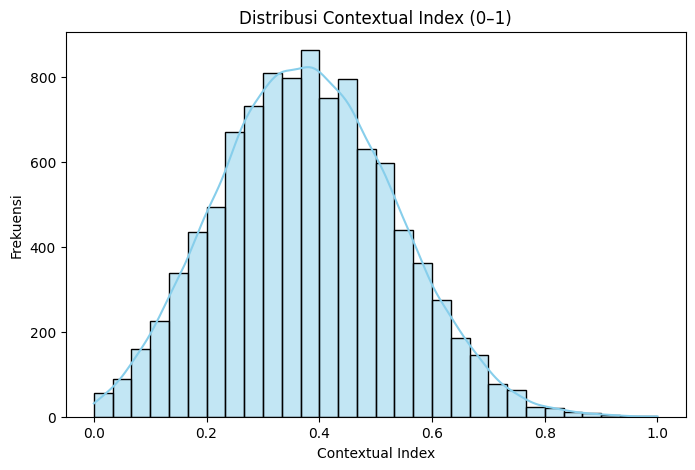

is_high
0    0.377452
1    0.390429
Name: contextual_index, dtype: float64


C:\Users\fajar\AppData\Local\Temp\ipykernel_20276\3722947332.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_high', y='contextual_index', data=df_contextual, palette='Set2')


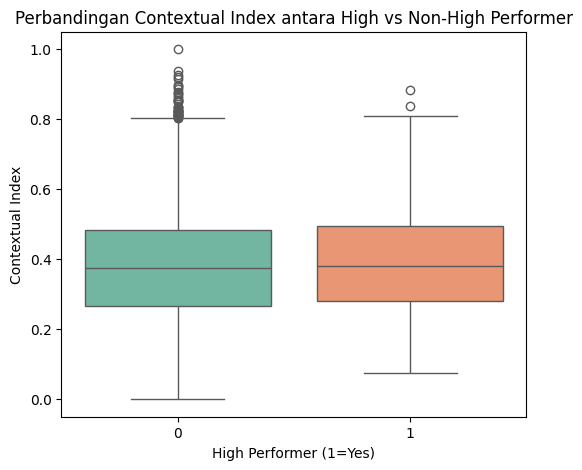

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribusi skor contextual
plt.figure(figsize=(8,5))
sns.histplot(df_contextual['contextual_index'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Contextual Index (0–1)")
plt.xlabel("Contextual Index")
plt.ylabel("Frekuensi")
plt.show()

# Rata-rata contextual_index per grup
mean_scores = df_contextual.groupby('is_high')['contextual_index'].mean()
print(mean_scores)

plt.figure(figsize=(6,5))
sns.boxplot(x='is_high', y='contextual_index', data=df_contextual, palette='Set2')
plt.title("Perbandingan Contextual Index antara High vs Non-High Performer")
plt.xlabel("High Performer (1=Yes)")
plt.ylabel("Contextual Index")
plt.show()


In [125]:
df_contextual[['employee_id', 'fullname', 'contextual_index']]


,employee_id,fullname,contextual_index
0,EMP100000,Rendra Pratama,0.326183
1,EMP100001,Wulan Setiawan,0.082555
2,EMP100002,Julia Jatmiko Situmorang,0.297527
3,EMP100003,Oka Halim,0.076768
4,EMP100004,Dwi Pratama,0.172896
...,...,...,...
10045,DUP1942,Dewi Fadillah Hidayat,0.646811
10046,DUP2096,Putri Wibowo,0.498978
10047,DUP4177,Adi Ginting,0.628351
10048,DUP9801,Ayu Kusuma Santoso,0.284829
